In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
df=pd.read_csv("project_dataset.csv")

In [2]:
df.shape

(45593, 20)

In [3]:
specific_value = "NaN "
df = df[~df.isin([specific_value]).any(axis=1)]
df.reset_index(drop=True, inplace=True)
df.shape

(41368, 20)

In [4]:
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [5]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,8:30:00,8:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,5/4/2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [6]:
df.describe()
edadf=df

In [7]:
df['Type_of_vehicle'].unique()

array(['motorcycle ', 'scooter ', 'electric_scooter '], dtype=object)

In [8]:
df = df.replace('motorcycle ', 0)
df = df.replace('scooter ', 1)
df = df.replace('electric_scooter ', 2)
df = df.replace('bicycle   ', 3)
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_10940\1298319076.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('electric_scooter ', 2)


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,0,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,1,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,8:30:00,8:45:00,conditions Sandstorms,Low,0,Drinks,0,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,5/4/2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,0,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,1,1,No,Metropolitian,(min) 30


In [9]:
print(df['City'].unique())
print(df['Type_of_order'].unique())
print(df['Weatherconditions'].unique())
print(df['Road_traffic_density'].unique())
print(df['Festival'].unique())

['Urban ' 'Metropolitian ' 'Semi-Urban ']
['Snack ' 'Drinks ' 'Buffet ' 'Meal ']
['conditions Sunny' 'conditions Stormy' 'conditions Sandstorms'
 'conditions Cloudy' 'conditions Fog' 'conditions Windy']
['High ' 'Jam ' 'Low ' 'Medium ']
['No ' 'Yes ']


In [10]:
df['Road_traffic_density'] = df['Road_traffic_density'].replace({
    'Low ': 0,
    'Medium ': 1,
    'High ': 2,
    'Jam ': 3,
})
df['Weatherconditions'] = df['Weatherconditions'].replace({
    'conditions Sunny': 0,
    'conditions Stormy': 1,
    'conditions Sandstorms': 2,
    'conditions Cloudy': 3,
    'conditions Fog': 3,
    'conditions Windy': 3,
})
df['City'] = df['City'].replace({
    'Urban ': 0,
    'Metropolitian ': 1,
    'Semi-Urban ': 2,
})

C:\Users\User\AppData\Local\Temp\ipykernel_10940\3115439102.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Road_traffic_density'] = df['Road_traffic_density'].replace({
C:\Users\User\AppData\Local\Temp\ipykernel_10940\3115439102.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Weatherconditions'] = df['Weatherconditions'].replace({
C:\Users\User\AppData\Local\Temp\ipykernel_10940\3115439102.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the o

In [11]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,0,2,2,Snack,0,0,No,0,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,1,3,2,Snack,1,1,No,1,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,8:30:00,8:45:00,2,0,0,Drinks,0,1,No,0,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,5/4/2022,18:00:00,18:10:00,0,1,0,Buffet,0,1,No,1,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,3,2,1,Snack,1,1,No,1,(min) 30


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41368 entries, 0 to 41367
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           41368 non-null  object 
 1   Delivery_person_ID           41368 non-null  object 
 2   Delivery_person_Age          41368 non-null  object 
 3   Delivery_person_Ratings      41368 non-null  object 
 4   Restaurant_latitude          41368 non-null  float64
 5   Restaurant_longitude         41368 non-null  float64
 6   Delivery_location_latitude   41368 non-null  float64
 7   Delivery_location_longitude  41368 non-null  float64
 8   Order_Date                   41368 non-null  object 
 9   Time_Orderd                  41368 non-null  object 
 10  Time_Order_picked            41368 non-null  object 
 11  Weatherconditions            41368 non-null  int64  
 12  Road_traffic_density         41368 non-null  int64  
 13  Vehicle_conditio

In [13]:
import pandas as pd
import numpy as np

# Set the Earth's radius (in kilometers)
R = 6371

# Convert degrees to radians
def deg_to_rad(degrees):
    return degrees * (np.pi / 180)

# Function to calculate the distance between two points using the haversine formula
def distcalculate(lat1, lon1, lat2, lon2):
    d_lat = deg_to_rad(lat2 - lat1)
    d_lon = deg_to_rad(lon2 - lon1)
    a = np.sin(d_lat / 2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c


# Calculate the distance between each pair of points using vectorized operations
df['distance'] = df.apply(
    lambda row: distcalculate(
        row['Restaurant_latitude'], 
        row['Restaurant_longitude'], 
        row['Delivery_location_latitude'], 
        row['Delivery_location_longitude']
    ), 
    axis=1
)

# Reset the index again if rows were dropped
df.reset_index(drop=True, inplace=True)

In [14]:
df['Time_taken(min)'] = df['Time_taken(min)'].str.extract('(\d+)').astype(float)

In [15]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,...,0,2,2,Snack,0,0,No,0,24.0,3.025149
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,...,1,3,2,Snack,1,1,No,1,33.0,20.183530
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,8:30:00,...,2,0,0,Drinks,0,1,No,0,26.0,1.552758
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,5/4/2022,18:00:00,...,0,1,0,Buffet,0,1,No,1,21.0,7.790401
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,...,3,2,1,Snack,1,1,No,1,30.0,6.210138


In [16]:
pdf=df.drop(columns=["Delivery_person_ID","Type_of_order","ID","Festival","Time_Order_picked","Order_Date","Restaurant_latitude","Delivery_location_latitude","Restaurant_longitude","Delivery_location_longitude"],axis='columns')

In [17]:
pdf.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,City,Time_taken(min),distance
0,37,4.9,11:30:00,0,2,2,0,0,0,24.0,3.025149
1,34,4.5,19:45:00,1,3,2,1,1,1,33.0,20.183530
2,23,4.4,8:30:00,2,0,0,0,1,0,26.0,1.552758
3,38,4.7,18:00:00,0,1,0,0,1,1,21.0,7.790401
4,32,4.6,13:30:00,3,2,1,1,1,1,30.0,6.210138


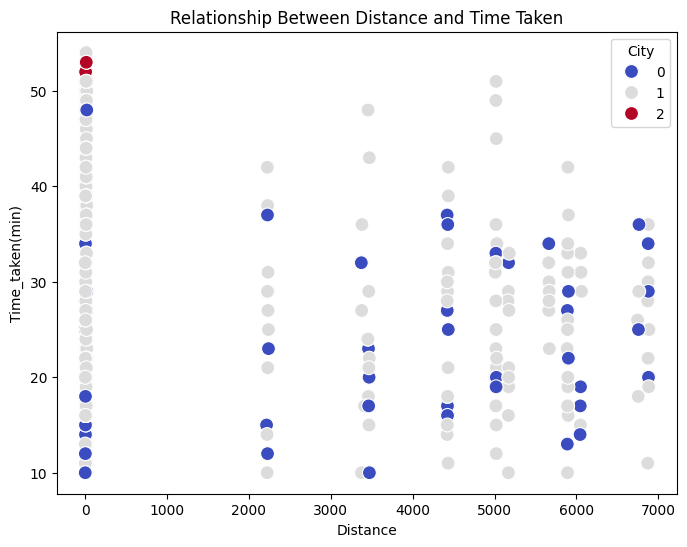

In [18]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pdf, x='distance', y='Time_taken(min)', hue='City', palette='coolwarm',s=100)
plt.xlabel('Distance')
plt.ylabel('Time_taken(min)')
plt.title('Relationship Between Distance and Time Taken')
plt.show()

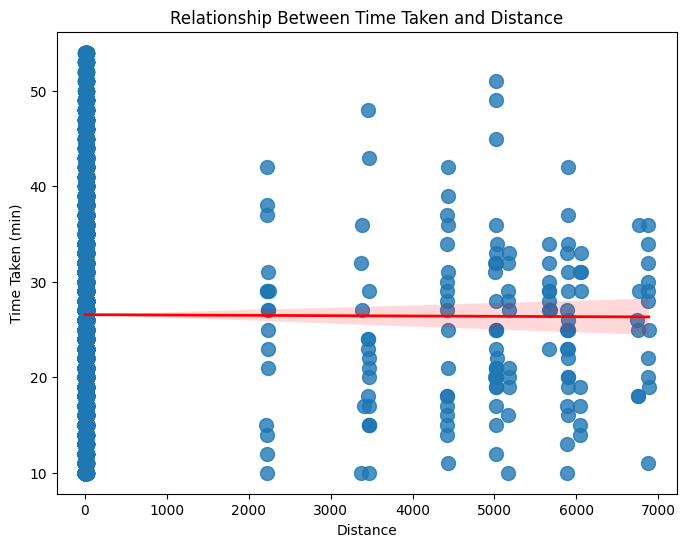

In [19]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df, 
            x='distance', 
            y='Time_taken(min)', 
            scatter_kws={'s': 100},  # Size of the scatter points
            line_kws={'color': 'red', 'linewidth': 2},  # Customize the trendline appearance
            
)
plt.xlabel('Distance')
plt.ylabel('Time Taken (min)')
plt.title('Relationship Between Time Taken and Distance')
plt.show()

In [20]:
from matplotlib import pyplot as plt

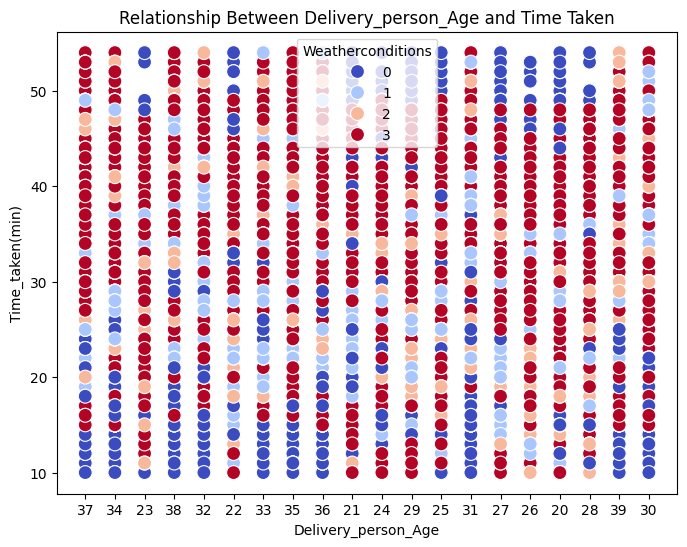

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pdf, x='Delivery_person_Age', y='Time_taken(min)', hue='Weatherconditions', palette='coolwarm',s=100)
plt.xlabel('Delivery_person_Age')
plt.ylabel('Time_taken(min)')
plt.title('Relationship Between Delivery_person_Age and Time Taken')
plt.show()

In [22]:
#plt.figure(figsize=(8, 6))
##sns.regplot(data=df, 
           # x='Delivery_person_Age', 
            #y='Time_taken(min)', 
         #   scatter_kws={'s': 100},  # Size of the scatter points
          #  line_kws={'color': 'red', 'linewidth': 2},  # Customize the trendline appearance
            
#)


#plt.xlabel('Delivery_person_Age')
#plt.ylabel('Time Taken (min)')
#plt.title('Relationship Between Time Taken and Delivery Person Age')
#plt.show()

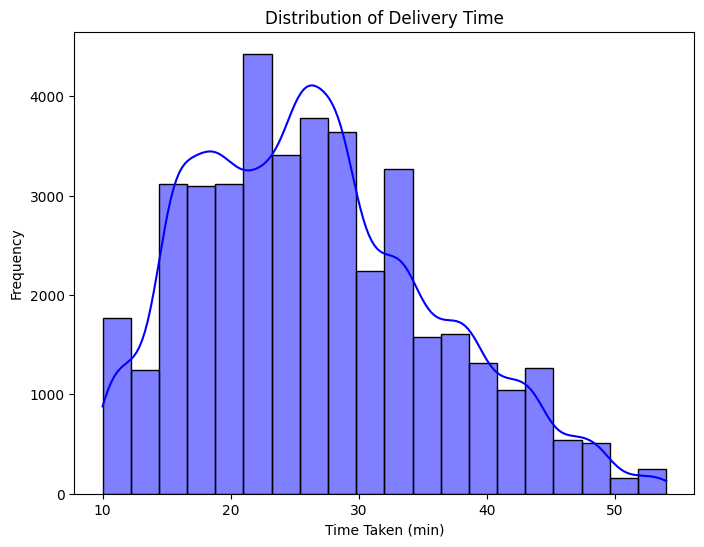

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Time_taken(min)'], kde=True, bins=20, color='blue')
plt.xlabel('Time Taken (min)')
plt.ylabel('Frequency')
plt.title('Distribution of Delivery Time')
plt.show()

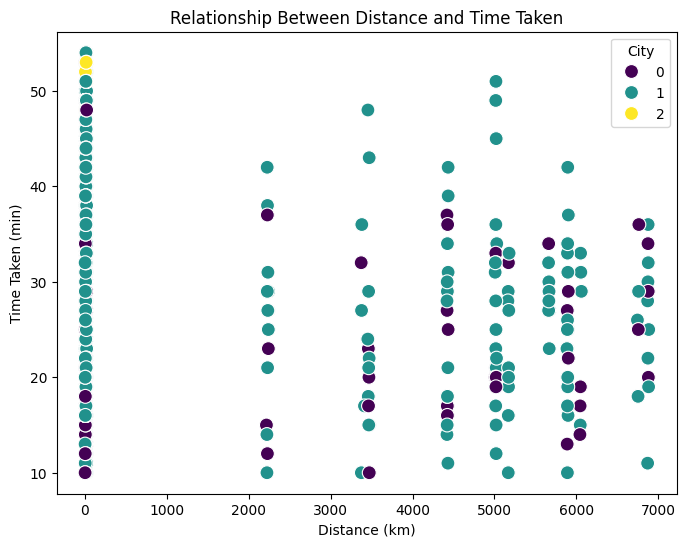

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='distance', y='Time_taken(min)', hue='City', palette='viridis', s=100)
plt.xlabel('Distance (km)')
plt.ylabel('Time Taken (min)')
plt.title('Relationship Between Distance and Time Taken')
plt.legend(title='City')
plt.show()

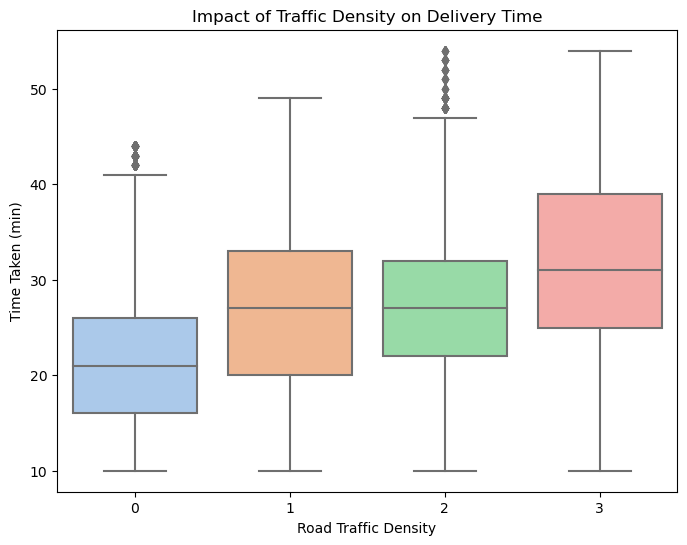

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Road_traffic_density', y='Time_taken(min)', palette='pastel')
plt.xlabel('Road Traffic Density')
plt.ylabel('Time Taken (min)')
plt.title('Impact of Traffic Density on Delivery Time')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_10940\823647397.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_avg_time.index, y=city_avg_time.values, palette='coolwarm')


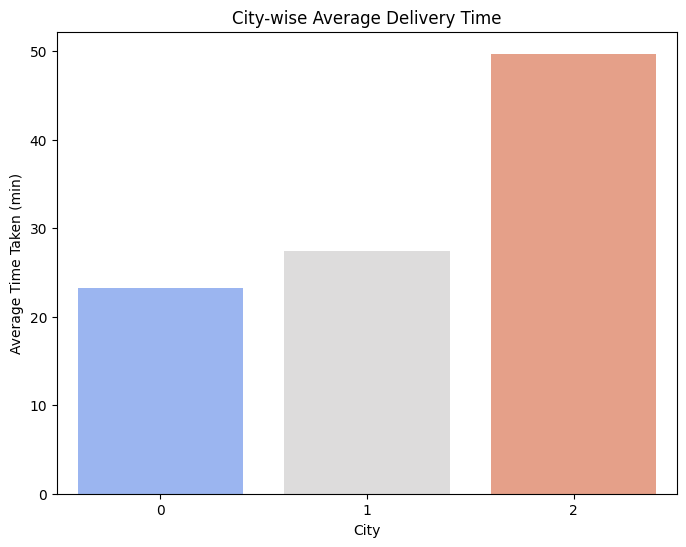

In [25]:
plt.figure(figsize=(8, 6))
city_avg_time = df.groupby('City')['Time_taken(min)'].mean().sort_values()
sns.barplot(x=city_avg_time.index, y=city_avg_time.values, palette='coolwarm')
plt.xlabel('City')
plt.ylabel('Average Time Taken (min)')
plt.title('City-wise Average Delivery Time')
plt.show()

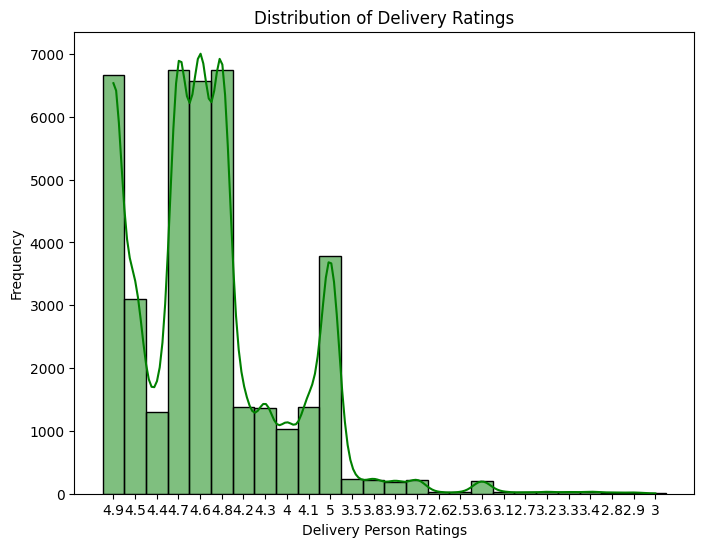

In [26]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Delivery_person_Ratings'], kde=True, bins=10, color='green')
plt.xlabel('Delivery Person Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Delivery Ratings')
plt.show()

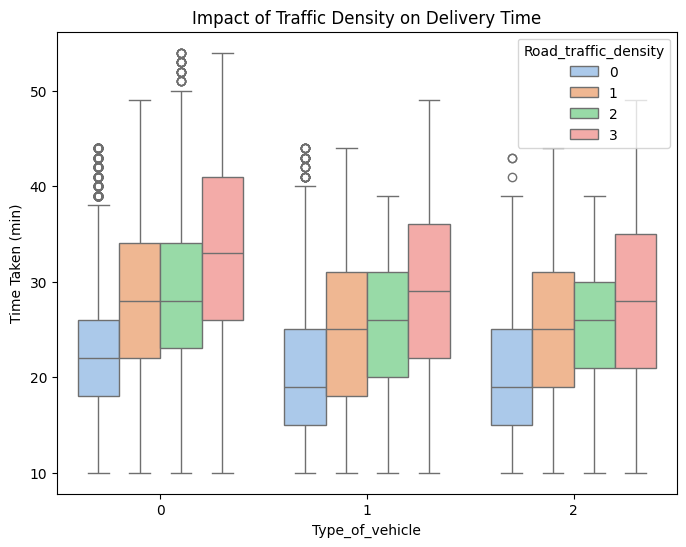

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Type_of_vehicle', y='Time_taken(min)',hue='Road_traffic_density', palette='pastel')
plt.xlabel('Type_of_vehicle')
plt.ylabel('Time Taken (min)')
plt.title('Impact of Traffic Density on Delivery Time')
plt.show()

DTypePromotionError: The DType <class 'numpy.dtypes._PyFloatDType'> could not be promoted by <class 'numpy.dtypes.StrDType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes._PyFloatDType'>)

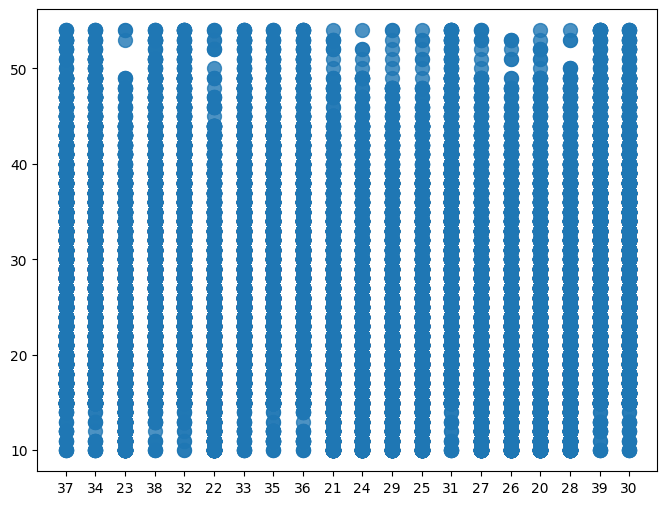

In [28]:

plt.figure(figsize=(8, 6))
sns.regplot(data=df, 
            x='Delivery_person_Age', 
            y='Time_taken(min)', 
            scatter_kws={'s': 100},  # Size of the scatter points
            line_kws={'color': 'red', 'linewidth': 2},  # Customize the trendline appearance
            
)


plt.xlabel('Delivery Person Age')
plt.ylabel('Time Taken (min)')
plt.title('Relationship Between Time Taken and Delivery Person Age')
plt.show()


In [29]:
x=df.drop(columns=["Delivery_person_ID","Time_Order_picked","Time_Orderd","Type_of_order","ID","Festival","Order_Date","Restaurant_latitude","Delivery_location_latitude","Restaurant_longitude","Delivery_location_longitude","multiple_deliveries","Time_taken(min)"],axis='columns')
y=df['Time_taken(min)']
x.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,City,distance
0,37,4.9,0,2,2,0,0,3.025149
1,34,4.5,1,3,2,1,1,20.183530
2,23,4.4,2,0,0,0,0,1.552758
3,38,4.7,0,1,0,0,1,7.790401
4,32,4.6,3,2,1,1,1,6.210138


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled

array([[ 1.28207517,  0.8446576 , -1.75925997, ..., -0.76906737,
        -1.82615358, -0.07994859],
       [ 0.76161075, -0.4217395 , -0.88680065, ...,  0.78948742,
         0.52534743, -0.02252014],
       [-1.14675879, -0.73833878, -0.01434133, ..., -0.76906737,
        -1.82615358, -0.08487663],
       ...,
       [ 0.06765819,  0.8446576 ,  0.85811798, ...,  0.78948742,
         0.52534743, -0.07448619],
       [-1.66722321,  0.21145905,  0.85811798, ..., -0.76906737,
         0.52534743, -0.06921407],
       [-1.14675879,  0.8446576 ,  0.85811798, ...,  0.78948742,
         0.52534743, -0.04966111]])

# Train - Test Split

In [31]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=20)

In [33]:
x_train.shape,x_test.shape

((33094, 8), (8274, 8))

In [34]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Decision Tree

In [35]:
from sklearn.tree import DecisionTreeRegressor as dt

In [36]:
dtmodel= dt(random_state=42)
dtmodel.fit(x_train,y_train)
y_pred_dt=dtmodel.predict(x_test)
print("score",dtmodel.score(x_test,y_test))
print("MAE",mean_absolute_error(y_test,y_pred_dt))
print("MSE",mean_squared_error(y_test,y_pred_dt))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_dt)))
print("R2_Score",r2_score(y_test,y_pred_dt))

score 0.5183669929721839
MAE 4.917129965353315
MSE 41.988343673622865
RMSE 6.479841330898687
R2_Score 0.5183669929721839


Model Score: 0.09064539521392313


# LinearRegression

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print("score for LR",lr.score(x_test,y_test))
print("MAE",mean_absolute_error(y_test,y_pred_lr))
print("MSE",mean_squared_error(y_test,y_pred_lr))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_lr)))
print("R2_Score",r2_score(y_test,y_pred_lr))

score for LR 0.469611747419708
MAE 5.453350758074031
MSE 46.238783274476475
RMSE 6.799910534299438
R2_Score 0.469611747419708


In [39]:
lr.predict([[37,4.9,0,2,2,0,0,3.025149]])

array([105.80936251])

# KNeighborsRegressor()

In [40]:
from sklearn.neighbors import KNeighborsRegressor

In [41]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
print("score ",knn.score(x_test,y_test))
print("MAE",mean_absolute_error(y_test,y_pred_knn))
print("MSE",mean_squared_error(y_test,y_pred_knn))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_knn)))
print("R2_Score",r2_score(y_test,y_pred_knn))

score  0.6304470509602097
MAE 4.426710176456369
MSE 32.21730239303843
RMSE 5.676028751956638
R2_Score 0.6304470509602097


# BaggingRegressor


In [42]:
from sklearn.ensemble import BaggingRegressor

In [57]:
bag_regressor = BaggingRegressor(random_state=1)
bag_regressor.fit(x_train, y_train)
bag_regressor.score(x_train, y_train)
print("score for bag_regressor",bag_regressor.score(x_test,y_test))

score for bag_regressor 0.7145013117432574


In [44]:
y_pred_bag=bag_regressor.predict(x_test)
print("score",bag_regressor.score(x_test,y_test))
print("MAE",mean_absolute_error(y_test,y_pred_bag))
print("MSE",mean_squared_error(y_test,y_pred_bag))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_bag)))
print("R2_Score",r2_score(y_test,y_pred_bag))

score 0.7145013117432574
MAE 3.8756570783981954
MSE 24.889525564015795
RMSE 4.9889403247599375
R2_Score 0.7145013117432574


In [45]:
Y_preds = bag_regressor.predict(x_test)

print('Training Coefficient of R^2 : %.3f'%bag_regressor.score(x_train, y_train))
print('Test Coefficient of R^2 : %.3f'%bag_regressor.score(x_test, y_test))

Training Coefficient of R^2 : 0.949
Test Coefficient of R^2 : 0.715


# GradientBoostingRegressor

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

In [47]:
gbr = GradientBoostingRegressor(random_state=42)

In [48]:
gbr.fit(x_train, y_train)
y_pred_gbr = gbr.predict(x_test)


In [49]:
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

In [50]:
print("Gradient Boosting Regressor Metrics:")
print(f"MAE: {mae_gbr:.4f}")
print(f"MSE: {mse_gbr:.4f}")
print(f"RMSE: {rmse_gbr:.4f}")
print(f"R² Score: {r2_gbr:.4f}")
gbr.score(x_test,y_test)

Gradient Boosting Regressor Metrics:
MAE: 3.8947
MSE: 23.6557
RMSE: 4.8637
R² Score: 0.7287


0.7286535479956823

# GridSearchCV

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
param_grids = {
    'DecisionTree': {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5],
    },
    'KNeighborsRegressor': {
        'n_neighbors': [3, 5, 10, 20],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]  # 1: Manhattan, 2: Euclidean
    },
    'BaggingRegressor': {
        'n_estimators': [10, 50, 100],
        'max_samples': [0.5, 0.8, 1.0],
        'max_features': [0.5, 0.8, 1.0]
    },
}


In [53]:
models = {
    'DecisionTree': dt(random_state=42),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'BaggingRegressor': BaggingRegressor(random_state=42)
}

In [54]:
best_models = {}
for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    grid = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='r2')
    grid.fit(x_train, y_train)
    print(f"Best params for {model_name}: {grid.best_params_}")
    print(f"Best R2 Score for {model_name}: {grid.best_score_:.4f}\n")
    best_models[model_name] = grid.best_estimator_


Tuning DecisionTree...
Best params for DecisionTree: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best R2 Score for DecisionTree: 0.7543

Tuning KNeighborsRegressor...
Best params for KNeighborsRegressor: {'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}
Best R2 Score for KNeighborsRegressor: 0.6385

Tuning BaggingRegressor...
Best params for BaggingRegressor: {'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 100}
Best R2 Score for BaggingRegressor: 0.7467



In [55]:
for model_name, model in best_models.items():
    test_score = model.score(x_test, y_test)
    print(f"{model_name} Test R2 Score: {test_score:.4f}")

DecisionTree Test R2 Score: 0.7556
KNeighborsRegressor Test R2 Score: 0.6460
BaggingRegressor Test R2 Score: 0.7479


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_gbr = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Initialize GridSearchCV
grid_search_gbr = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid_gbr,
    cv=5,  # 5-fold cross-validation
    scoring='r2',
    verbose=1
)

# Perform the grid search
grid_search_gbr.fit(x_train, y_train)

# Best parameters and score
print("Best Parameters for Gradient Boosting Regressor:")
print(grid_search_gbr.best_params_)
print(f"Best R² Score: {grid_search_gbr.best_score_:.4f}")

# Evaluate the best model on the test set
best_gbr = grid_search_gbr.best_estimator_
test_r2 = best_gbr.score(x_test, y_test)
print(f"Test R² Score for Best Gradient Boosting Regressor: {test_r2:.4f}")


In [ ]:
import pickle
with open('gradient_boosting_model.pkl', 'wb') as file:
    pickle.dump(gbr, file)